# GENERATE DATES OF WELFORDBANK

Requisitos:  
- MÁS DE 1500 filas, (1500 clientes min)  
- Entonces mínimo la bases de datos 1500 por cada tabla  
- Fecha que se creo el banco 1-1-2020

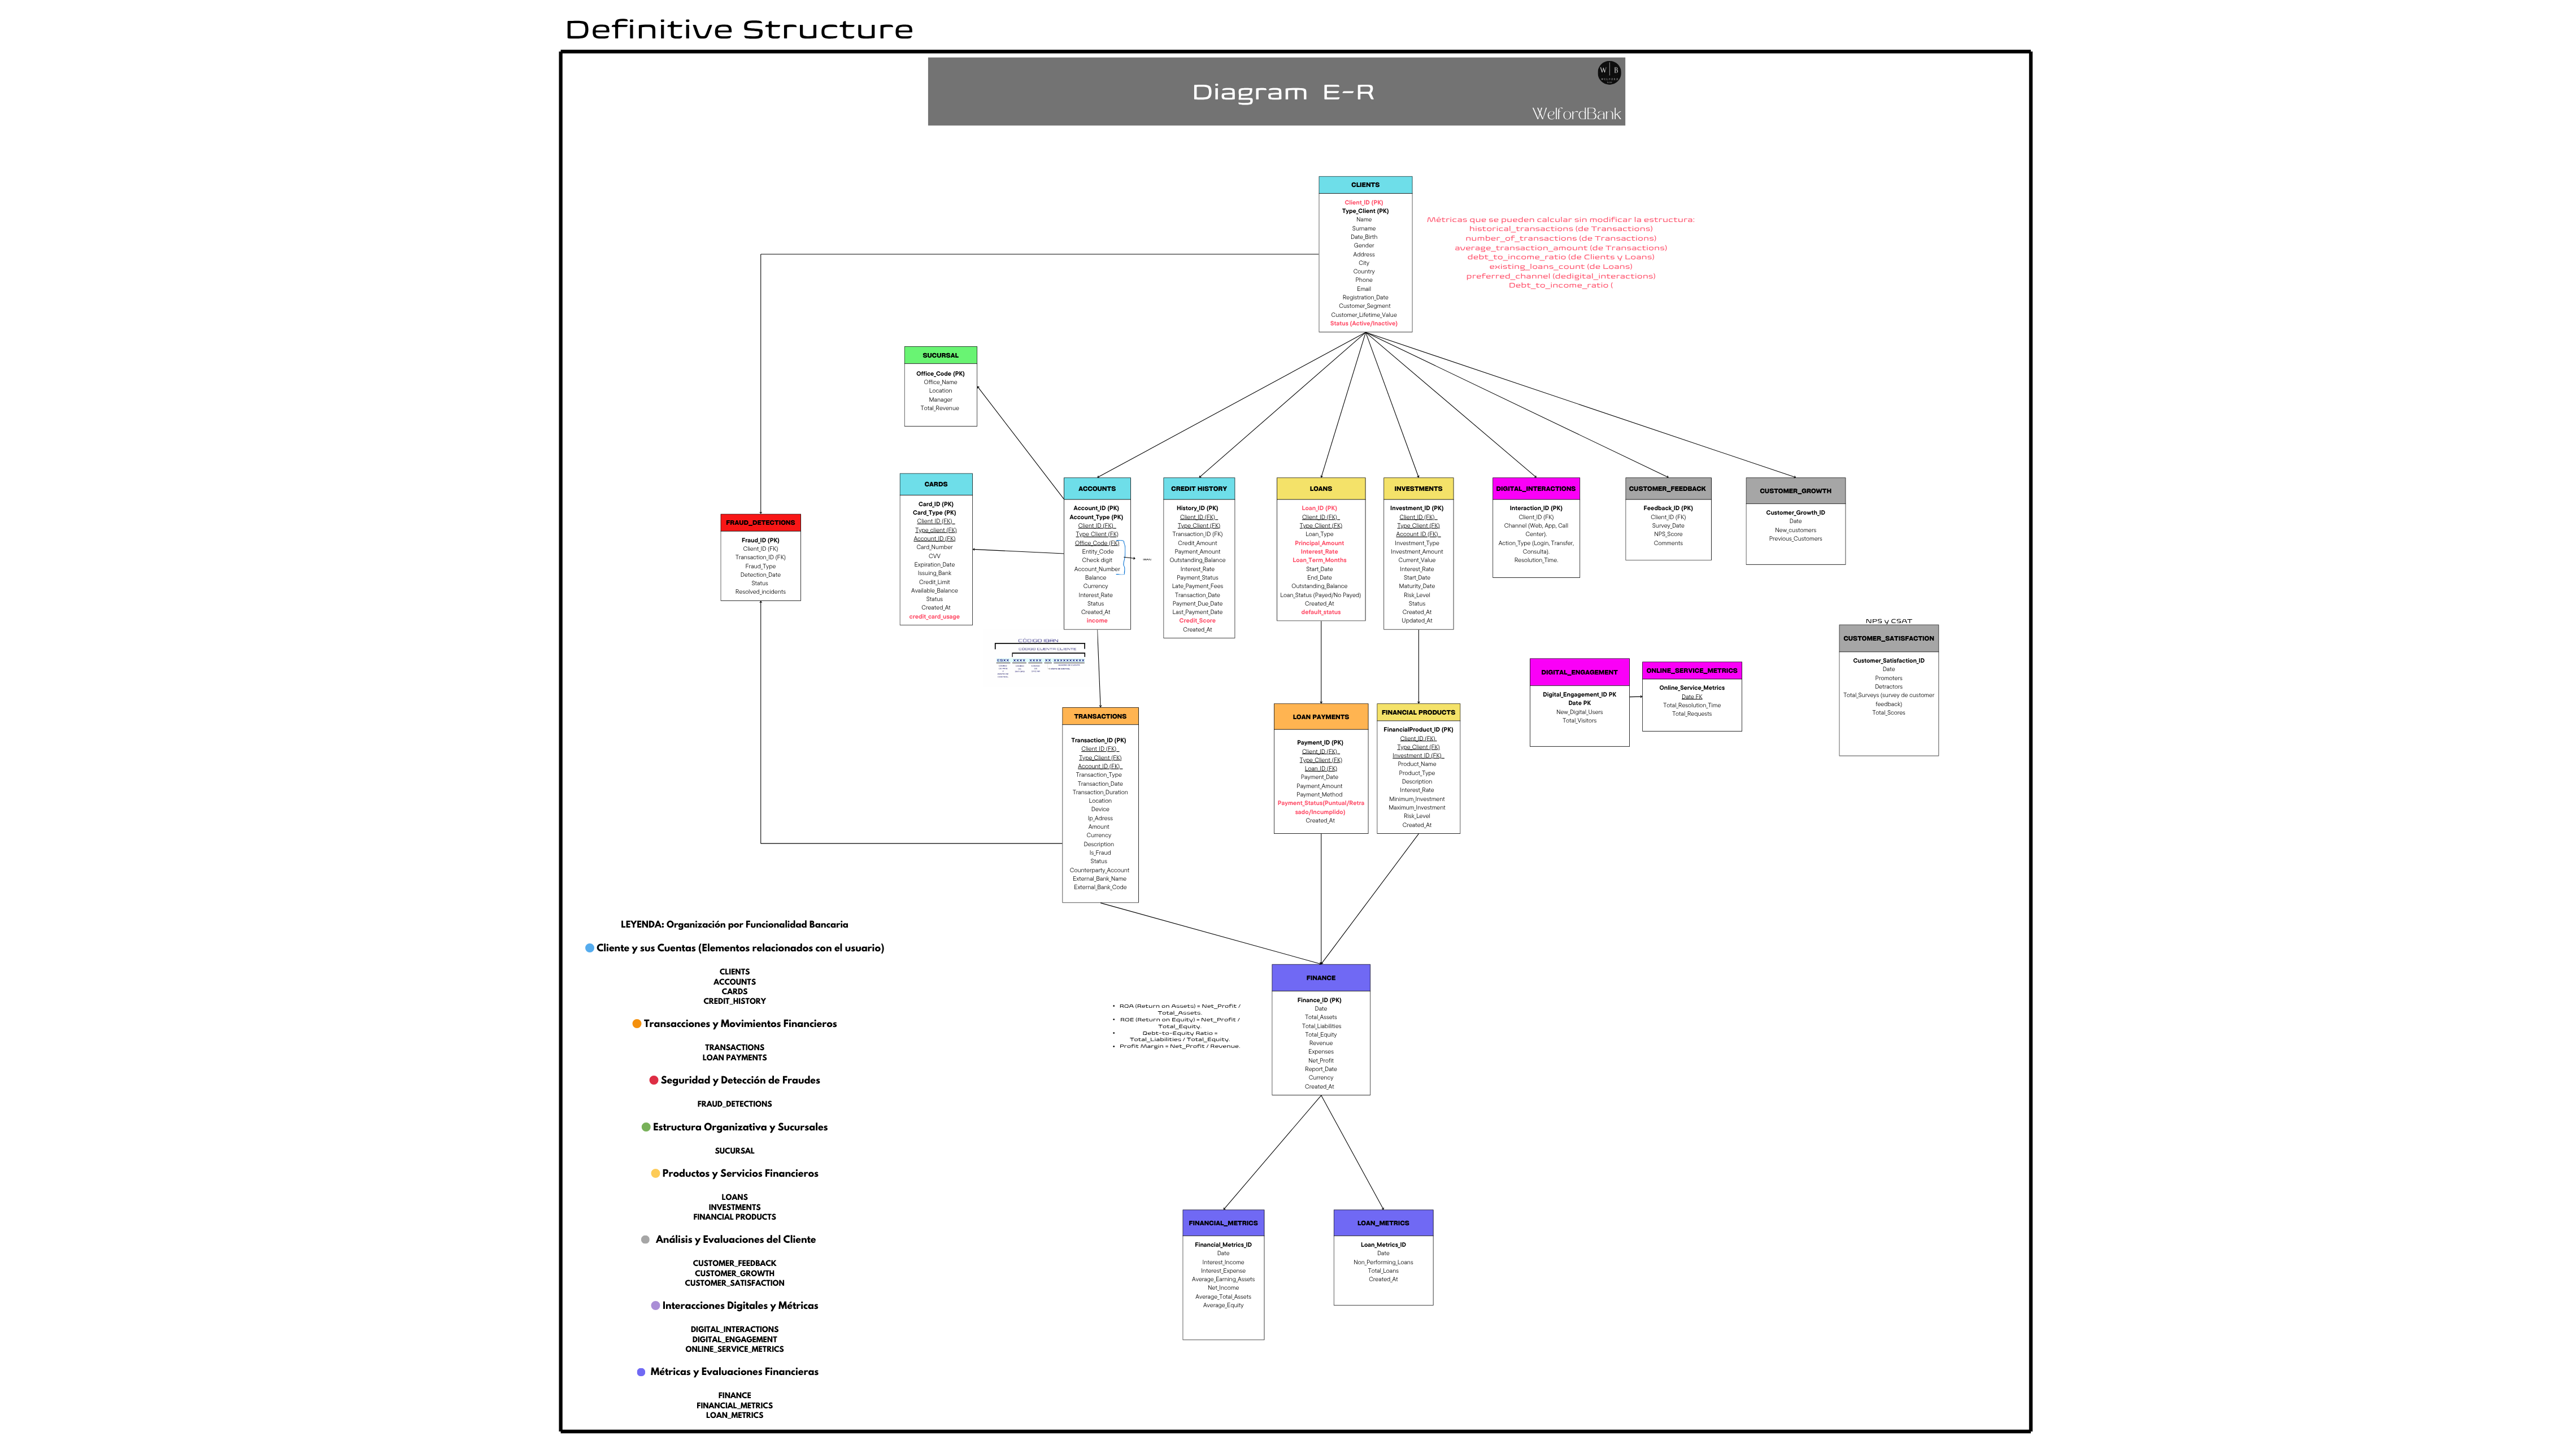

##### PRINCIPAL TABLE CLIENTS

In [5]:
pip install faker

  Obtaining dependency information for faker from https://files.pythonhosted.org/packages/ce/99/045b2dae19a01b9fbb23b9971bc04f4ef808e7f3a213d08c81067304a210/faker-37.3.0-py3-none-any.whl.metadata
  Obtaining dependency information for tzdata from https://files.pythonhosted.org/packages/5c/23/c7abc0ca0a1526a0774eca151daeb8de62ec457e77262b66b359c3c7679e/tzdata-2025.2-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.9 MB 4.5 MB/s eta 0:00:01
   ------- -------------------------------- 0.4/1.9 MB 3.8 MB/s eta 0:00:01
   ---------- ----------------------------- 0.5/1.9 MB 4.7 MB/s eta 0:00:01
   ---------- ----------------------------- 0.5/1.9 MB 4.7 MB/s eta 0:00:01
   ------------------- -------------------- 0.9/1.9 MB 3.9 MB/s eta 0:00:01
   ----------------------------- ---------- 1.5/1.9 MB 5.1 MB/s eta 0:00:01
   -------------------------------------- - 1.9/1.9 MB 5.7 MB/s eta 0:00:01
 

In [6]:
from __future__ import annotations
import random
import numpy as np
import pandas as pd
from datetime import datetime, timedelta, date
from faker import Faker
import unicodedata



SEED = 15
random.seed(SEED)
np.random.seed(SEED)
fake = Faker('es_ES')
Faker.seed(SEED)


In [2]:
PROVINCE_CITIES = {"Álava": ["Vitoria-Gasteiz", "Llodio"], "Albacete": ["Albacete", "Hellín"], "Alicante": ["Alicante", "Elche", "Benidorm"], "Almería": ["Almería", "Roquetas de Mar"], "Asturias": ["Oviedo", "Gijón", "Avilés"], "Ávila": ["Ávila", "Arévalo"], "Badajoz": ["Badajoz", "Mérida", "Don Benito"], "Barcelona": ["Barcelona", "Hospitalet de Llobregat", "Terrassa", "Sabadell"], "Burgos": ["Burgos", "Miranda de Ebro", "Aranda de Duero"], "Cáceres": ["Cáceres", "Plasencia"], "Cádiz": ["Cádiz", "Jerez de la Frontera", "Algeciras"], "Cantabria": ["Santander", "Torrelavega"], "Castellón": ["Castellón de la Plana", "Villarreal"], "Ciudad Real": ["Ciudad Real", "Puertollano", "Tomelloso"], "Córdoba": ["Córdoba", "Lucena", "Puente Genil"], "Cuenca": ["Cuenca", "Tarancón"], "Girona": ["Girona", "Figueres", "Blanes"], "Granada": ["Granada", "Motril", "Almuñécar"], "Guadalajara": ["Guadalajara", "Azuqueca de Henares"], "Guipúzcoa": ["San Sebastián", "Irún", "Eibar"], "Huelva": ["Huelva", "Lepe"], "Huesca": ["Huesca", "Barbastro", "Monzón"], "Illes Balears": ["Palma", "Manacor", "Ibiza"], "Jaén": ["Jaén", "Linares", "Andújar"], "La Coruña": ["A Coruña", "Santiago de Compostela", "Ferrol"], "La Rioja": ["Logroño", "Calahorra", "Haro"], "Las Palmas": ["Las Palmas de Gran Canaria", "Telde", "Arrecife"], "León": ["León", "Ponferrada", "San Andrés del Rabanedo"], "Lleida": ["Lleida", "Balaguer"], "Lugo": ["Lugo", "Monforte de Lemos", "Vilalba"], "Madrid": ["Madrid", "Alcalá de Henares", "Móstoles", "Getafe"], "Málaga": ["Málaga", "Marbella", "Fuengirola"], "Murcia": ["Murcia", "Cartagena", "Lorca"], "Navarra": ["Pamplona", "Tudela"], "Ourense": ["Ourense", "Verín"], "Palencia": ["Palencia", "Guardo"], "Pontevedra": ["Pontevedra", "Vigo", "Vilagarcía de Arousa"], "Salamanca": ["Salamanca", "Béjar", "Ciudad Rodrigo"], "Santa Cruz de Tenerife": ["Santa Cruz de Tenerife", "San Cristóbal de La Laguna", "Arona"], "Segovia": ["Segovia", "Cuéllar"], "Sevilla": ["Sevilla", "Dos Hermanas", "Utrera"], "Soria": ["Soria", "Almazán"], "Tarragona": ["Tarragona", "Reus", "Salou"], "Teruel": ["Teruel", "Alcañiz"], "Toledo": ["Toledo", "Talavera de la Reina", "Illescas"], "Valencia": ["Valencia", "Gandía", "Torrent"], "Valladolid": ["Valladolid", "Medina del Campo", "Laguna de Duero"], "Zamora": ["Zamora", "Benavente", "Toro"], "Zaragoza": ["Zaragoza", "Calatayud", "Ejea de los Caballeros"], "Ceuta": ["Ceuta"], "Melilla": ["Melilla"]}

DOMAINS = ['gmail.com', 'hotmail.com', 'outlook.com', 'welfordbank.es']
fake = Faker('es_ES')

def clean_text(text: str) -> str:
    nfkd = unicodedata.normalize("NFKD", text)
    only_ascii = ''.join(c for c in nfkd if not unicodedata.combining(c))
    return only_ascii.lower().replace(' ', '')

def random_email(first: str, last1: str, existing: set[str]) -> str:
    local = f"{clean_text(first)}.{clean_text(last1)}"
    domain = random.choice(DOMAINS)
    email = f"{local}@{domain}"
    i = 1
    while email in existing:
        email = f"{local}{i}@{domain}"
        i += 1
    existing.add(email)
    return email

def generate_address():
    street = f"{fake.street_name()} {random.randint(1, 300)}"
    province = random.choice(list(PROVINCE_CITIES.keys()))
    city = random.choice(PROVINCE_CITIES[province])
    return f"{street}, {city}", city, province


In [7]:
N_CLIENTS = 1500
SEGMENTS = ['Platino', 'Oro', 'Plata', 'Bronce']
SEGMENT_WEIGHTS = [0.05, 0.15, 0.4, 0.4]

rows = []
used_emails: set[str] = set()

for cid in range(1, N_CLIENTS + 1):
    tipo = 'Empresa' if random.random() < 0.2 else 'Individual'
    address, city, province = generate_address()

    if tipo == 'Individual':
        nombre = fake.first_name()
        apellido1 = fake.last_name()
        apellido2 = fake.last_name()
        apellidos = f"{apellido1} {apellido2}"
        genero = random.choice(['Hombre', 'Mujer'])
        fecha_nacimiento = fake.date_of_birth(minimum_age=18, maximum_age=90)
        email = random_email(nombre, apellido1, used_emails)
    else:
        nombre = fake.company()
        apellidos = ''
        genero = ''
        fecha_nacimiento = fake.date_between_dates(date_start=date(1950,1,1), date_end=date(2024,1,1))
        slug = clean_text(''.join(filter(str.isalnum, nombre)))
        email = random_email(slug[:10], 'empresa', used_emails)

    telefono = fake.phone_number()
    fecha_alta = fake.date_between_dates(date_start=date(2020,1,1), date_end=date.today())
    segmento = random.choices(SEGMENTS, weights=SEGMENT_WEIGHTS)[0]
    clv = round(random.gauss(mu=20000, sigma=8000), 2)
    estatus = random.choices(['Activo', 'Inactivo'], weights=[0.8, 0.2])[0]

    rows.append({
        'Client_ID': cid,
        'Type_Client': tipo,
        'Name': nombre,
        'Surname': apellidos,
        'Date_Birth': fecha_nacimiento,
        'Gender': genero,
        'Address': address,
        'City': city,
        'Province': province,
        'Country': 'España',
        'Phone': telefono,
        'Email': email,
        'Registration_Date': fecha_alta,
        'Customer_Segment': segmento,
        'Customer_Lifetime_Value': clv,
        'Status': estatus
    })

df_clients = pd.DataFrame(rows)
df_clients.head()


,Client_ID,Type_Client,Name,Surname,Date_Birth,Gender,Address,City,Province,Country,Phone,Email,Registration_Date,Customer_Segment,Customer_Lifetime_Value,Status
0,1,Individual,Fausto,Haro Alegria,1941-11-11,Hombre,"Plaza Azahar Arce 6, Pamplona",Pamplona,Navarra,España,+34 845 531 575,fausto.haro@hotmail.com,2022-05-21,Platino,28793.37,Inactivo
1,2,Individual,Rosa,Fábregas Padilla,1977-01-12,Mujer,"Callejón de Omar Granados 123, Terrassa",Terrassa,Barcelona,España,+34 877 486 397,rosa.fabregas@outlook.com,2023-07-28,Plata,11689.42,Activo
2,3,Individual,Valentín,Miró Sanjuan,1989-07-08,Hombre,"Avenida de Íñigo Palomino 106, Manacor",Manacor,Illes Balears,España,+34 820703282,valentin.miro@outlook.com,2025-03-22,Bronce,14210.90,Activo
3,4,Individual,Evaristo,Cabo Carnero,1988-03-12,Mujer,"Cañada Benita Uría 41, Vilalba",Vilalba,Lugo,España,+34 806 178 468,evaristo.cabo@welfordbank.es,2021-12-22,Plata,19585.72,Inactivo
4,5,Individual,Cayetano,Gutierrez Menéndez,1976-09-28,Mujer,"Paseo Angelita Otero 208, Ceuta",Ceuta,Ceuta,España,+34 848 567 571,cayetano.gutierrez@gmail.com,2022-04-26,Oro,9210.93,Activo


In [30]:
df_clients.to_csv('clients_welfordbank_es.csv', index=False)
print('CSV guardado en clients_welfordbank_es.csv')


CSV guardado en clients_welfordbank_es.csv


### Genereting Acounts table

In [31]:
# Weights for Spanish mod-11 checksum
W_BANK_OFFICE = [4, 8, 5, 10, 9, 7, 3, 6]        # bank + branch (8 digits)
W_ACCOUNT     = [1, 2, 4,  8, 5,10, 9, 7, 3, 6]  # account number (10 digits)

def _dc_block(digits: str, weights: list[int]) -> int:
    # multiply each digit by its weight, sum, and apply mod-11 rule
    s = sum(int(d) * w for d, w in zip(digits, weights))
    resto = 11 - (s % 11)           # 11 − (sum mod 11)
    return {11: 0, 10: 1}.get(resto, resto)  # special cases → 0 or 1

def generate_spanish_bban() -> tuple[str, str, str, str]:
    # random 4-digit bank & branch codes
    entity = f"{random.randint(0, 9999):04d}"
    office = f"{random.randint(0, 9999):04d}"
    # random 10-digit account number
    account_number = f"{random.randint(0, 9_999_999_999):010d}"

    # two control digits (DC1 for bank+branch, DC2 for account)
    dc1 = _dc_block(entity + office, W_BANK_OFFICE)
    dc2 = _dc_block(account_number, W_ACCOUNT)
    dc = f"{dc1}{dc2}"

    # return the four BBAN parts
    return entity, office, dc, account_number

In [32]:
ACCOUNT_TYPES = ["CHECKING", "SAVINGS", "MORTGAGE", "TERM"]  # possible account kinds
CURRENCY = "EUR"                                             # default currency


def pick_account_type() -> str:
    # choose account type with given probabilities
    return random.choices(
        ACCOUNT_TYPES,
        weights=[0.5, 0.3, 0.1, 0.1],
        k=1
    )[0]

def pick_status() -> str:
    # ACTIVE or INACTIVE
    return random.choice(["ACTIVE", "INACTIVE"])

def interest_rate(acct_type: str) -> float:
    # simple rate table by account type
    return {
        "SAVINGS":  round(random.uniform(0.20, 1.50), 2),
        "CHECKING": round(random.uniform(0.00, 0.10), 2),
        "MORTGAGE": round(random.uniform(1.50, 3.50), 2),
        "TERM":     round(random.uniform(0.80, 2.20), 2),
    }.get(acct_type, 0.0)

def random_balance() -> float:
    # 100 € – 150 000 €
    return round(random.uniform(100.0, 150_000.0), 2)


accounts_rows = []

for _, cli in df_clients.iterrows():                             # loop over every client
    # decide how many accounts (1–3) this client will have
    for _ in range(random.choices([1, 2, 3], weights=[0.7, 0.25, 0.05])[0]):
        ent, off, dc, acc_num = generate_spanish_bban()          # valid 20-digit BBAN
        acct_type = pick_account_type()

        accounts_rows.append({
            "Account_ID": fake.uuid4(),                          # PK (uuid)
            "Account_Type": acct_type,                           # account category
            "Client_ID": cli["Client_ID"],                       # FK → CLIENTS
            "Type_Client": cli["Type_Client"],                   # FK → CLIENTS
            "Office_Code": off,                                  # FK → SUCURSAL
            "Entity_Code": ent,
            "Check_Digit": dc,                                   # 2-digit DC from BBAN
            "Account_Number": acc_num,                           # 10-digit number from BBAN
            "Balance": random_balance(),
            "Currency": CURRENCY,
            "Interest_Rate": interest_rate(acct_type),
            "Status": pick_status(),
            "Created_At": fake.date_between_dates(               # opening date
                date_start=pd.to_datetime(cli["Registration_Date"]).date(),
                date_end=datetime.now().date() - timedelta(days=1)
            ),
            "income": round(random.uniform(800.0, 8000.0), 2)    # monthly income proxy
        })

# convert to DataFrame
df_accounts = pd.DataFrame(accounts_rows)
df_accounts.head()                                               # quick preview

,Account_ID,Account_Type,Client_ID,Type_Client,Office_Code,Entity_Code,Check_Digit,Account_Number,Balance,Currency,Interest_Rate,Status,Created_At,income
0,d6e9249d-dc53-48ad-b3f7-66dc3aef0ce5,CHECKING,1,Individual,2606,7701,84,5903551968,107282.44,EUR,0.06,ACTIVE,2024-01-25,2724.92
1,faea4078-62d4-4b87-8246-91a4e07d531c,CHECKING,1,Individual,2218,4852,12,5483783299,55212.54,EUR,0.06,ACTIVE,2024-12-31,3607.29
2,22e8a093-4a5c-4490-826f-a159dae1dd86,CHECKING,2,Individual,8002,2740,81,5266422622,111358.39,EUR,0.01,INACTIVE,2023-10-02,2812.55
3,871a98ba-eef6-472a-b208-dae4c8617d8f,CHECKING,2,Individual,6468,5084,51,9905113910,123678.01,EUR,0.07,INACTIVE,2023-08-30,2166.31
4,dc7d9aff-d3c4-4480-b80b-9c8404ed35d9,SAVINGS,3,Individual,7547,1799,57,9630676859,32721.29,EUR,1.44,INACTIVE,2025-02-18,5548.94


In [33]:
# save the accounts DataFrame to a CSV file
df_accounts.to_csv("accounts_welfordbank_es.csv", index=False)

# simple console confirmation
print("CSV guardado en accounts_welfordbank_es.csv")

CSV guardado en accounts_welfordbank_es.csv


### Genrar tabla Credit history

In [34]:
# Credit record status values
PAYMENT_STATUSES = ["PAID", "PENDING", "OVERDUE"]

# Random loan principal (€1 000 – €50 000)
def choose_credit_amount() -> float:
    return round(random.uniform(1_000.0, 50_000.0), 2)

# Random annual interest rate (2 % – 12 %)
def choose_interest_rate() -> float:
    return round(random.uniform(2.0, 12.0), 2)

# Simple monthly payment estimate (no amortization schedule)
def calc_payment_amount(credit: float, rate: float, months: int = 12) -> float:
    total = credit * (1 + (rate / 100) * (months / 12))
    return round(total / months, 2)

# Synthetic credit score (FICO-like 300–850 range)
def generate_credit_score() -> int:
    return random.randint(300, 850)

In [35]:
# container for every credit record that will be created
credit_rows = []

# iterate over every client to build their credit history
for _, cli in df_clients.iterrows():
    # choose how many credit records this client gets (0-3)
    n_histories = random.choices([0, 1, 2, 3],
                                 weights=[0.15, 0.55, 0.25, 0.05])[0]
    
    for _ in range(n_histories):
        # loan set-up: principal, interest, monthly payment
        credit_amount  = choose_credit_amount()
        interest_rate  = choose_interest_rate()
        payment_amount = calc_payment_amount(credit_amount, interest_rate)
        
        # transaction date must fall between registration and 60 days ago
        reg_date = pd.to_datetime(cli["Registration_Date"]).date()
        max_end  = datetime.now().date() - timedelta(days=60)

        if reg_date >= max_end:                 # very new client
            transaction_date = reg_date
        else:
            transaction_date = fake.date_between_dates(
                date_start=reg_date,
                date_end=max_end
            )

        # 30 days to pay; last payment can be early or up to +40 days late
        payment_due_date  = transaction_date + timedelta(days=30)
        last_payment_date = payment_due_date + timedelta(days=random.randint(-5, 40))
        
        # outstanding balance after X random payments
        payments_made = random.randint(0, 12)
        outstanding   = max(round(credit_amount - payments_made * payment_amount, 2), 0.0)
        
        # determine status and late fees
        if outstanding == 0:
            status = "PAID"
            late_fees = 0.0
        else:
            overdue  = datetime.now().date() > payment_due_date
            status   = "OVERDUE" if overdue else "PENDING"
            late_fees = round(outstanding * 0.02, 2) if overdue else 0.0

        # append one row to the list
        credit_rows.append({
            "History_ID": fake.uuid4(),            # primary key
            "Client_ID": cli["Client_ID"],         # FK to CLIENTS
            "Type_Client": cli["Type_Client"],
            "Transaction_ID": fake.uuid4(),
            "Credit_Amount": credit_amount,
            "Payment_Amount": payment_amount,
            "Outstanding_Balance": outstanding,
            "Interest_Rate": interest_rate,
            "Payment_Status": status,
            "Late_Payment_Fees": late_fees,
            "Transaction_Date": transaction_date,
            "Payment_Due_Date": payment_due_date,
            "Last_Payment_Date": last_payment_date,
            "Credit_Score": generate_credit_score(),
            "Created_At": datetime.now().date()
        })

# build DataFrame and preview the first rows
df_credit_history = pd.DataFrame(credit_rows)
df_credit_history.head()

,History_ID,Client_ID,Type_Client,Transaction_ID,Credit_Amount,Payment_Amount,Outstanding_Balance,Interest_Rate,Payment_Status,Late_Payment_Fees,Transaction_Date,Payment_Due_Date,Last_Payment_Date,Credit_Score,Created_At
0,139b5b13-19f6-4a56-9ae3-1bee9d8819f2,1,Individual,1b0f67b1-f8a3-4c77-9a3d-c725a13171ec,37866.87,3233.83,18463.89,2.48,OVERDUE,369.28,2023-04-06,2023-05-06,2023-05-19,618,2025-05-15
1,bdf7eaad-6c2a-4309-85bd-7ea0e0f8331b,2,Individual,c604dafc-8a6d-47b7-8593-29d346a88d25,3042.94,274.02,1124.80,8.06,OVERDUE,22.50,2020-11-16,2020-12-16,2021-01-21,723,2025-05-15
2,b938f886-1953-4205-9588-06c10ec9b742,3,Individual,4b1398d5-cb36-47e6-b32e-1cbb7a34e5c3,24812.13,2278.17,6586.77,10.18,OVERDUE,131.74,2023-07-15,2023-08-14,2023-09-01,683,2025-05-15
3,acfc1335-7cb5-45e5-a1ac-4a27d879d841,4,Individual,563b0691-eeaa-44b9-94e3-adfb55fb60e5,18637.72,1614.03,2497.42,3.92,OVERDUE,49.95,2022-07-12,2022-08-11,2022-09-10,595,2025-05-15
4,a9300471-85ef-40e1-b442-a0aee8f0e69b,4,Individual,718a8cf5-4050-4e21-afe2-3fae6c17987d,46742.26,4038.14,42704.12,3.67,OVERDUE,854.08,2021-01-17,2021-02-16,2021-02-26,682,2025-05-15


In [36]:
# write the credit-history DataFrame to a CSV file (skip index column)
df_credit_history.to_csv("credit_history_welfordbank_es.csv", index=False)

# quick confirmation message in the console
print("CSV guardado en credit_history_welfordbank_es.csv")

CSV guardado en credit_history_welfordbank_es.csv


### generar tabla sucursal

In [37]:
# -------------------------------------------------------------
#  Build the SUCURSAL (branch) table
# -------------------------------------------------------------
# 1) Group accounts by Office_Code and sum their income
office_summary = (
    df_accounts
    .groupby("Office_Code", as_index=False)           # one row per branch
    .agg(Total_Revenue=("income", "sum"))             # branch revenue
)

# 2) Add synthetic metadata for each branch
office_summary["Office_Name"] = office_summary["Office_Code"].apply(
    lambda code: f"Sucursal {code}"                   # readable branch name
)
office_summary["Location"] = office_summary["Office_Code"].apply(
    lambda _: fake.city()                             # random city
)
office_summary["Manager"] = office_summary["Office_Code"].apply(
    lambda _: f"{fake.first_name()} {fake.last_name()}"  # random manager
)

# 3) Select and order the final columns
df_sucursal = office_summary[
    ["Office_Code", "Office_Name", "Location", "Manager", "Total_Revenue"]
]

df_sucursal.head()                                    # quick preview


,Office_Code,Office_Name,Location,Manager,Total_Revenue
0,0003,Sucursal 0003,Málaga,Gala Acosta,3645.42
1,0004,Sucursal 0004,Navarra,Gertrudis Estrada,2063.74
2,0011,Sucursal 0011,Madrid,Melisa Laguna,7443.32
3,0016,Sucursal 0016,Álava,Fortunato Colom,4306.93
4,0018,Sucursal 0018,Vizcaya,Julio César Prado,7927.56


In [38]:
# export the branch (sucursal) table to CSV without the index column
df_sucursal.to_csv("sucursal_welfordbank_es.csv", index=False)

# console confirmation message
print("CSV guardado en sucursal_welfordbank_es.csv")


CSV guardado en sucursal_welfordbank_es.csv


### generar tabla cards

In [39]:
CARD_TYPES   = ["DEBIT", "CREDIT"]      # two kinds of cards we issue
ISSUING_BANK = "Welford Bank"           # fixed bank name for all cards
STATUS_OPTS  = ["ACTIVE", "INACTIVE"]   # lifecycle states

def luhn_checksum(card_number: str) -> int:
    """
    Standard Luhn algorithm:
    – double every second digit from the right
    – subtract 9 if the result is > 9
    – checksum is the amount needed to reach
      the next multiple of 10.
    """
    digits = [int(d) for d in card_number]
    for i in range(len(digits) - 2, -1, -2):          # even positions (0-based from right)
        doubled = digits[i] * 2
        digits[i] = doubled - 9 if doubled > 9 else doubled
    return (10 - sum(digits) % 10) % 10

def generate_card_number(bin_prefix: str = "4540") -> str:
    """
    Build a 16-digit card number:
      • 4-digit BIN prefix (Visa ES by default)
      • 11 random digits
      • 1 Luhn checksum digit
    """
    body = "".join(str(random.randint(0, 9)) for _ in range(11))
    checksum = luhn_checksum(bin_prefix + body)
    return bin_prefix + body + str(checksum)

def pick_card_type() -> str:
    # choose between DEBIT (60 %) or CREDIT (40 %)
    return random.choices(CARD_TYPES, weights=[0.6, 0.4])[0]

def credit_limit(card_type: str) -> float:
    # credit cards get a limit (1 000–10 000 €); debit cards get 0
    return round(random.uniform(1000, 10_000), 2) if card_type == "CREDIT" else 0.0

def available_balance(card_type: str, limit: float) -> float:
    # for credit: random available amount ≤ limit
    # for debit: returning 0 (can be replaced with account balance if desired)
    if card_type == "CREDIT":
        return round(random.uniform(0, limit), 2)
    else:
        return 0.0

In [40]:
card_rows = []

for _, acc in df_accounts.iterrows():
    # decide how many cards this account has (0, 1 or 2)
    n_cards = random.choices([0, 1, 2], weights=[0.2, 0.6, 0.2])[0]
    
    for _ in range(n_cards):
        c_type  = pick_card_type()                 # DEBIT or CREDIT
        c_limit = credit_limit(c_type)             # credit limit (only for credit cards)
        c_avail = available_balance(c_type, c_limit)

        card_rows.append({
            "Card_ID": fake.uuid4(),               # primary key (UUID)
            "Card_Type": c_type,                   # DEBIT / CREDIT
            "Client_ID": acc["Client_ID"],         # FK → CLIENTS
            "Type_Client": acc["Type_Client"],     # FK → CLIENTS
            "Account_ID": acc["Account_ID"],       # FK → ACCOUNTS
            "Card_Number": generate_card_number(), # 16-digit Luhn-valid number
            "CVV": f"{random.randint(0, 999):03d}",# 3-digit security code
            "Expiration_Date": fake.date_between_dates(  # 1–5 years from now
                date_start=datetime.now().date() + timedelta(days=365),
                date_end=datetime.now().date() + timedelta(days=5*365)
            ),
            "Issuing_Bank": ISSUING_BANK,          # constant bank name
            "Credit_Limit": c_limit,               # 0 for debit cards
            "Available_Balance": c_avail,          # remaining credit
            "Status": random.choice(STATUS_OPTS),  # ACTIVE / INACTIVE
            "Created_At": fake.date_between_dates( # issued between account opening and today
                date_start=acc["Created_At"],
                date_end=datetime.now().date()
            ),
            "credit_card_usage": round(            # utilisation ratio (credit cards only)
                (c_limit - c_avail) / c_limit, 4
            ) if c_type == "CREDIT" and c_limit else None
        })

# convert list of dicts → DataFrame and preview
df_cards = pd.DataFrame(card_rows)
df_cards.head()

,Card_ID,Card_Type,Client_ID,Type_Client,Account_ID,Card_Number,CVV,Expiration_Date,Issuing_Bank,Credit_Limit,Available_Balance,Status,Created_At,credit_card_usage
0,20aae5c5-6dbd-4f30-9fb6-7ad78e3135a3,DEBIT,1,Individual,d6e9249d-dc53-48ad-b3f7-66dc3aef0ce5,4540686057782621,462,2029-06-18,Welford Bank,0.00,0.00,INACTIVE,2024-02-21,NaN
1,520d763d-f2e2-4444-8118-cf6ddaa33bc9,CREDIT,1,Individual,d6e9249d-dc53-48ad-b3f7-66dc3aef0ce5,4540089479971220,311,2028-10-09,Welford Bank,3029.49,2948.58,ACTIVE,2024-12-20,0.0267
2,ab58eb70-ecef-4b99-aa58-8c360292f560,DEBIT,1,Individual,faea4078-62d4-4b87-8246-91a4e07d531c,4540331985266342,142,2026-10-16,Welford Bank,0.00,0.00,ACTIVE,2025-01-11,NaN
3,ce1589b6-eec5-4bf2-bbcd-dedc44dcf6ae,DEBIT,2,Individual,22e8a093-4a5c-4490-826f-a159dae1dd86,4540196899838017,378,2030-03-06,Welford Bank,0.00,0.00,INACTIVE,2024-08-29,NaN
4,f38d21c5-648c-46c0-8c8e-c71633da2fd4,DEBIT,2,Individual,22e8a093-4a5c-4490-826f-a159dae1dd86,4540210001219681,959,2028-11-03,Welford Bank,0.00,0.00,ACTIVE,2023-11-25,NaN


In [41]:
# save the cards table to CSV (no index column)
df_cards.to_csv("cards_welfordbank_es.csv", index=False)

# console confirmation
print("CSV guardado en cards_welfordbank_es.csv")

CSV guardado en cards_welfordbank_es.csv


### generar tabla transaccions

In [42]:
TX_TYPES   = ["DEPOSIT", "WITHDRAWAL", "TRANSFER", "PAYMENT"]  # operation kind
DEVICES    = ["WEB", "MOBILE", "ATM", "POS"]                  # channel / device
STATUSES   = ["COMPLETED", "PENDING", "FAILED"]               # final state
CURRENCY   = "EUR"                                            # fixed currency

# external banks used as counterparties for transfers
EXTERNAL_BANKS = [
    ("Banco Central", "BCENESMMXXX"),
    ("Caja Popular",  "CPOPESMMXXX"),
    ("EuroBank",      "EURBESMMXXX"),
    ("Financiera 24", "FIN24ESMXXX"),
]


def pick_tx_type() -> str:
    # choose transaction type (weighted probabilities)
    return random.choices(
        TX_TYPES,
        weights=[0.25, 0.25, 0.3, 0.2],
        k=1
    )[0]

def tx_amount(tx_type: str) -> float:
    # set amount range by type, then draw a random value
    match tx_type:
        case "DEPOSIT":     rng = (50, 10_000)
        case "WITHDRAWAL":  rng = (20, 2_000)
        case "PAYMENT":     rng = (5, 5_000)
        case "TRANSFER":    rng = (10, 15_000)
    return round(random.uniform(*rng), 2)

def flag_fraud(amount: float) -> bool:
    # very simple fraud rule: big amount + 10 % chance
    return amount > 8_000 and random.random() < 0.1

def tx_description(tx_type: str) -> str:
    # Spanish label for each type
    return {
        "DEPOSIT":    "Ingreso en cuenta",
        "WITHDRAWAL": "Retirada en efectivo",
        "PAYMENT":    "Pago con tarjeta",
        "TRANSFER":   "Transferencia bancaria",
    }[tx_type]

In [43]:
from ipaddress import IPv4Address
from datetime import datetime, timedelta

tx_rows = []                              # list to collect row-dicts

for _, acc in df_accounts.iterrows():     # loop through each account
    n_tx = random.randint(10, 100)        # 10–100 transactions per account
    
    for _ in range(n_tx):
        # ---- basic transaction attributes ----
        tx_type  = pick_tx_type()         # DEPOSIT, WITHDRAWAL, TRANSFER, PAYMENT
        amount   = tx_amount(tx_type)     # € amount based on type
        is_fraud = flag_fraud(amount)     # simple fraud flag
        
        # date between account opening and today
        start_date = pd.to_datetime(acc["Created_At"]).date()
        tx_date    = fake.date_between_dates(
            date_start=start_date,
            date_end=datetime.now().date()
        )
        
        duration = random.randint(3, 600) # seconds the operation took
        
        #  counterpart info (only for transfers) 
        counterparty_acc, ext_bank_name, ext_bank_code = (None, None, None)
        if tx_type == "TRANSFER":
            counterparty_acc = fake.iban()
            ext_bank_name, ext_bank_code = random.choice(EXTERNAL_BANKS)
        
        #  append one transaction row 
        tx_rows.append({
            "Transaction_ID":  fake.uuid4(),                 # PK
            "Client_ID":       acc["Client_ID"],             # FK → CLIENTS
            "Type_Client":     acc["Type_Client"],
            "Account_ID":      acc["Account_ID"],            # FK → ACCOUNTS
            "Transaction_Type": tx_type,
            "Transaction_Date": tx_date,
            "Transaction_Duration": duration,                # seconds
            "Location": fake.city(),
            "Device": random.choice(DEVICES),                # WEB / MOBILE / ATM / POS
            "Ip_Address": str(IPv4Address(random.getrandbits(32))),
            "Amount": amount,
            "Currency": CURRENCY,
            "Description": tx_description(tx_type),          # Spanish label
            "Is_Fraud": is_fraud,
            "Status": random.choice(STATUSES),               # COMPLETED, PENDING, FAILED
            "Counterparty_Account": counterparty_acc,
            "External_Bank_Name": ext_bank_name,
            "External_Bank_Code": ext_bank_code
        })

# convert list → DataFrame and preview first rows
df_transactions = pd.DataFrame(tx_rows)
df_transactions.head()

,Transaction_ID,Client_ID,Type_Client,Account_ID,Transaction_Type,Transaction_Date,Transaction_Duration,Location,Device,Ip_Address,Amount,Currency,Description,Is_Fraud,Status,Counterparty_Account,External_Bank_Name,External_Bank_Code
0,aeeef629-b2cd-4f7d-a439-9fbeef98c993,1,Individual,d6e9249d-dc53-48ad-b3f7-66dc3aef0ce5,TRANSFER,2024-03-19,575,Toledo,ATM,236.193.3.214,1256.04,EUR,Transferencia bancaria,False,COMPLETED,ES1103628196208429822340,Banco Central,BCENESMMXXX
1,4caa82d2-0c28-4657-b34b-a583d59e00f6,1,Individual,d6e9249d-dc53-48ad-b3f7-66dc3aef0ce5,TRANSFER,2025-03-20,362,Córdoba,WEB,16.126.148.232,10164.76,EUR,Transferencia bancaria,False,COMPLETED,ES2373162190627134393801,Financiera 24,FIN24ESMXXX
2,98bbdf8e-c5d4-4422-a5c2-f361510e1008,1,Individual,d6e9249d-dc53-48ad-b3f7-66dc3aef0ce5,PAYMENT,2024-10-13,174,Baleares,ATM,16.108.253.104,4214.13,EUR,Pago con tarjeta,False,COMPLETED,None,None,None
3,8a8c75c4-338c-48c5-9657-7acd9468e698,1,Individual,d6e9249d-dc53-48ad-b3f7-66dc3aef0ce5,DEPOSIT,2024-12-18,579,Lugo,WEB,255.51.126.135,8259.71,EUR,Ingreso en cuenta,False,FAILED,None,None,None
4,8d45a086-147c-4610-935f-5bf5c8b40401,1,Individual,d6e9249d-dc53-48ad-b3f7-66dc3aef0ce5,PAYMENT,2024-04-01,272,Tarragona,MOBILE,90.215.37.132,4158.72,EUR,Pago con tarjeta,False,FAILED,None,None,None


In [44]:
# save the transactions DataFrame as a CSV file (without the index column)
df_transactions.to_csv("transactions_welfordbank_es.csv", index=False)

# quick console confirmation
print("CSV guardado en transactions_welfordbank_es.csv")

CSV guardado en transactions_welfordbank_es.csv


### TABLE LOANS

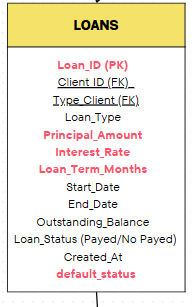

In [10]:
df_clients = pd.read_csv('clients_welfordbank_es.csv')
client_ids = df_clients['Client_ID'].tolist()

In [13]:
#DEFINIMOS LOS TIPOS DE PRESTAMOS QUE SE HACEN.
LOAN_PRODUCTS = [
    {
        'Loan_Type': 'Hipotecario',
        'Rate_ANNUAL': 1.5,
        'Term_Months': 240,
        'Min_Amount': 50_000,
        'Max_Amount': 500_000
    },
    {
        'Loan_Type': 'Personal',
        'Rate_ANNUAL': 4.2,
        'Term_Months': 60,
        'Min_Amount': 1_000,
        'Max_Amount': 50_000
    },
    {
        'Loan_Type': 'Automóvil',
        'Rate_ANNUAL': 3.8,
        'Term_Months': 48,
        'Min_Amount': 5_000,
        'Max_Amount': 100_000
    },
    {
        'Loan_Type': 'Línea de Crédito',
        'Rate_ANNUAL': 6.0,
        'Term_Months': 12,
        'Min_Amount': 500,
        'Max_Amount': 20_000
    },
]

In [11]:
from datetime import date

In [14]:
rows = []
loan_id = 1

for cid in client_ids:
    # cada cliente tendrá de media 0.8 préstamos (Poisson)
    n_loans = np.random.poisson(0.8)
    for _ in range(n_loans):
        prod = random.choice(LOAN_PRODUCTS)
        
        # fecha de inicio en los últimos 5 años
        start_date = fake.date_between(start_date=date(2020,1,1), end_date='today')
        # fecha estimada de fin
        end_date = pd.to_datetime(start_date) + pd.DateOffset(months=prod['Term_Months'])
        
        # monto del principal
        principal = round(random.uniform(prod['Min_Amount'], prod['Max_Amount']), 2)
        # estado del préstamo (70% ya cerrado, 30% activo)
        status = random.choices(['Activo', 'Cerrado'], weights=[0.3, 0.7])[0]
        
        # saldo vivo: si está activo, queda igual al principal (o podrías descontar pagado)
        outstanding = principal if status == 'Activo' else 0.0
        
        # si ha entrado en mora (5% de préstamos)
        default = random.choices(['No', 'Sí'], weights=[0.95, 0.05])[0]
        
        # fecha de creación del registro (un par de días antes de la firma)
        created_at = fake.date_time_between(
            start_date=pd.to_datetime(start_date) - pd.Timedelta(days=7),
            end_date=pd.to_datetime(start_date)
        )
        
        rows.append({
            'Loan_ID':          loan_id,
            'Client_ID':        cid,
            'Loan_Type':        prod['Loan_Type'],
            'Principal_Amount': principal,
            'Interest_Rate':    prod['Rate_ANNUAL'],
            'Loan_Term_Months': prod['Term_Months'],
            'Start_Date':       start_date,
            'End_Date':         end_date.date(),
            'Outstanding_Balance': outstanding,
            'Loan_Status':      status,
            'Default_Status':   default,
            'Created_At':       created_at
        })
        loan_id += 1

In [16]:
# Lo volcamos a DataFrame y CSV
df_loans = pd.DataFrame(rows)
df_loans.head()

,Loan_ID,Client_ID,Loan_Type,Principal_Amount,Interest_Rate,Loan_Term_Months,Start_Date,End_Date,Outstanding_Balance,Loan_Status,Default_Status,Created_At
0,1,4,Personal,1571.08,4.2,60,2021-10-11,2026-10-11,0.0,Cerrado,No,2021-10-04 03:23:40
1,2,8,Personal,1827.15,4.2,60,2024-06-07,2029-06-07,0.0,Cerrado,No,2024-05-31 10:32:13
2,3,9,Automóvil,27772.94,3.8,48,2021-05-05,2025-05-05,0.0,Cerrado,No,2021-04-30 21:35:57
3,4,9,Automóvil,42266.19,3.8,48,2020-02-22,2024-02-22,0.0,Cerrado,No,2020-02-15 16:00:17
4,5,9,Personal,43852.10,4.2,60,2021-04-02,2026-04-02,0.0,Cerrado,No,2021-03-30 10:58:54


In [17]:

df_loans.to_csv('loans_welfordbank_es.csv', index=False)
print(f"Generados {len(df_loans)} préstamos y exportados a loans_welfordbank.csv")

Generados 1180 préstamos y exportados a loans_welfordbank.csv


### Table INVESTMENTS:

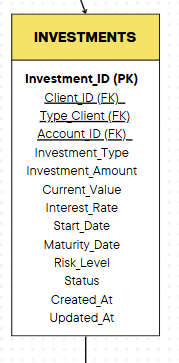

In [18]:
df_clients = pd.read_csv('clients_welfordbank_es.csv')
client_ids = df_clients['Client_ID'].tolist()

In [19]:
# 3. Simulamos cuentas por cliente para la FK Account_ID
#    Suponemos que cada cliente tiene entre 1 y 3 cuentas
account_counter = 1
accounts_by_client: dict[int, list[int]] = {}
for cid in client_ids:
    n_acc = random.randint(1, 3)
    # Creamos ids consecutivos para las cuentas de este cliente
    accounts_by_client[cid] = list(range(account_counter, account_counter + n_acc))
    account_counter += n_acc

In [20]:
# 4. Definimos los productos de inversión con sus parámetros
INVESTMENT_PRODUCTS = [
    {
        'Investment_Type': 'Fondo Renta Fija',
        'Min_Amount': 1_000,
        'Max_Amount': 50_000,
        'Rate_ANNUAL': 2.5,
        'Term_Months': 36,
        'Risk_Level': 'Baja'
    },
    {
        'Investment_Type': 'Fondo Renta Variable',
        'Min_Amount': 5_000,
        'Max_Amount': 100_000,
        'Rate_ANNUAL': 5.0,
        'Term_Months': 60,
        'Risk_Level': 'Media'
    },
    {
        'Investment_Type': 'Depósito a Plazo',
        'Min_Amount': 500,
        'Max_Amount': 20_000,
        'Rate_ANNUAL': 1.2,
        'Term_Months': 12,
        'Risk_Level': 'Baja'
    }
]

In [21]:
# 5. Generación de inversiones
rows = []
inv_id = 1
today = pd.Timestamp(date.today())

for cid in client_ids:
    # Cada cliente tendrá un número de inversiones según Poisson (media 1.2)
    n_inv = np.random.poisson(1.2)
    for _ in range(n_inv):
        # 5.1 Seleccionamos un producto al azar
        prod = random.choice(INVESTMENT_PRODUCTS)
        
        # 5.2 Fecha de inicio entre el 1-1-2020 y hoy
        start_date = fake.date_between(start_date=date(2020, 1, 1), end_date=date.today())
        start_ts = pd.Timestamp(start_date)
        
        # 5.3 Fecha de vencimiento (maturity) sumando meses de plazo
        maturity_ts = start_ts + pd.DateOffset(months=prod['Term_Months'])
        
        # 5.4 Importe invertido aleatorio entre min y max definidos
        amount = round(random.uniform(prod['Min_Amount'], prod['Max_Amount']), 2)
        
        # 5.5 Tasa anual e identificación de riesgo
        rate = prod['Rate_ANNUAL']
        risk = prod['Risk_Level']
        
        # 5.6 Estado: activo si no ha vencido, "Matured" si la fecha de hoy supera maturity_ts
        status = 'Activo' if today < maturity_ts else 'Vencido'
        
        # 5.7 Cálculo de valor actual según interés compuesto simple anual
        #     Si está activo, valor hasta hoy; si vencido, valor al vencimiento.
        #     Usamos años transcurridos para componer.
        end_for_calc = today if status == 'Activo' else maturity_ts
        years = (end_for_calc - start_ts).days / 365.25
        current_value = round(amount * (1 + rate/100) ** years, 2)
        
        # 5.8 Fechas de creación y última actualización del registro
        created_at = fake.date_time_between(
            start_date=start_ts - pd.Timedelta(days=7), 
            end_date=start_ts
        )
        # Updated_at entre created_at y ahora
        updated_at = fake.date_time_between(start_date=created_at, end_date=datetime.now())
        
        # 5.9 Elegimos una de las cuentas del cliente para FK Account_ID
        account_id = random.choice(accounts_by_client[cid])
        
        # 5.10 Construimos la fila de la inversión
        rows.append({
            'Investment_ID':     inv_id,
            'Client_ID':         cid,
            'Type_Client':       df_clients.loc[df_clients['Client_ID'] == cid, 'Type_Client'].iloc[0],
            'Account_ID':        account_id,
            'Investment_Type':   prod['Investment_Type'],
            'Investment_Amount': amount,
            'Current_Value':     current_value,
            'Interest_Rate':     rate,
            'Start_Date':        start_date,
            'Maturity_Date':     maturity_ts.date(),
            'Risk_Level':        risk,
            'Status':            status,
            'Created_At':        created_at,
            'Updated_At':        updated_at
        })
        
        # Incrementamos el contador de IDs para la próxima inversión
        inv_id += 1


In [22]:
# 6. Volcamos a DataFrame y guardamos a CSV
df_investments = pd.DataFrame(rows)
df_investments.head()

,Investment_ID,Client_ID,Type_Client,Account_ID,Investment_Type,Investment_Amount,Current_Value,Interest_Rate,Start_Date,Maturity_Date,Risk_Level,Status,Created_At,Updated_At
0,1,1,Individual,2,Fondo Renta Fija,40984.84,41472.60,2.5,2024-11-25,2027-11-25,Baja,Activo,2024-11-23 08:32:38,2024-12-21 04:31:24
1,2,2,Individual,5,Fondo Renta Fija,2714.49,2923.26,2.5,2021-05-10,2024-05-10,Baja,Vencido,2021-05-05 17:18:14,2022-02-22 18:06:05
2,3,2,Individual,4,Fondo Renta Fija,38193.10,41130.49,2.5,2021-04-28,2024-04-28,Baja,Vencido,2021-04-27 10:08:15,2025-02-14 04:28:13
3,4,3,Individual,8,Fondo Renta Variable,63369.64,66137.15,5.0,2024-07-03,2029-07-03,Media,Activo,2024-06-28 22:36:30,2025-01-08 06:59:53
4,5,4,Individual,9,Depósito a Plazo,2172.59,2198.64,1.2,2022-10-24,2023-10-24,Baja,Vencido,2022-10-17 17:09:45,2023-01-31 03:21:27


In [23]:
df_investments.to_csv('investments_welfordbank_es.csv', index=False)
print(f"Generadas {len(df_investments)} inversiones y exportadas a 'investments_welfordbank_es.csv'.")

Generadas 1807 inversiones y exportadas a 'investments_welfordbank_es.csv'.


### Table LOAN PAYMENTS

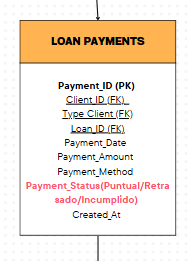

In [25]:
# 2. Cargamos las tablas previas: loans y clientes
df_loans = pd.read_csv('loans_welfordbank_es.csv', parse_dates=['Start_Date', 'End_Date'])
df_clients = pd.read_csv('clients_welfordbank_es.csv')
# Unimos para tener Type_Client en pagos
df_loans = df_loans.merge(df_clients[['Client_ID','Type_Client']], on='Client_ID', how='left')

In [26]:
# 3. Definimos métodos y pesos para Payment_Status y Payment_Method
payment_methods = ['Transferencia', 'Domiciliación', 'Efectivo']
status_choices = ['Puntual', 'Retrasado', 'Incumplido']
status_weights = [0.90, 0.08, 0.02]  # 90% puntuales, 8% retrasados, 2% incumplidos

In [28]:
# 4. Función para calcular cuota mensual según amortización francesa
def calc_monthly_payment(principal, annual_rate, months):
    r = annual_rate / 12 / 100
    return principal * r / (1 - (1 + r) ** -months)


In [29]:
# 5. Generar pagos
rows = []
payment_id = 1
today = pd.Timestamp(datetime.today().date())

In [30]:
for _, loan in df_loans.iterrows():
    principal = loan['Principal_Amount']
    rate = loan['Interest_Rate']
    term = int(loan['Loan_Term_Months'])
    start = pd.Timestamp(loan['Start_Date'])
    end = pd.Timestamp(loan['End_Date'])
    
    # Determinamos cuántos meses se han pagado
    if loan['Loan_Status'] == 'Activo':
        n_paid = min(term, ((today.year - start.year) * 12 + today.month - start.month))
    else:
        n_paid = term
    
    # Calculamos la cuota mensual
    monthly_pay = calc_monthly_payment(principal, rate, term)
    
    # Creamos un pago por mes
    for i in range(1, n_paid + 1):
        pay_date = start + pd.DateOffset(months=i)
        amount = round(monthly_pay, 2)
        method = random.choice(payment_methods)
        status = random.choices(status_choices, weights=status_weights)[0]
        created_at = fake.date_time_between(start_date=pay_date - pd.Timedelta(days=3),
                                            end_date=pay_date)
        
        rows.append({
            'Payment_ID':      payment_id,
            'Client_ID':       loan['Client_ID'],
            'Type_Client':     loan['Type_Client'],
            'Loan_ID':         loan['Loan_ID'],
            'Payment_Date':    pay_date.date(),
            'Payment_Amount':  amount,
            'Payment_Method':  method,
            'Payment_Status':  status,
            'Created_At':      created_at
        })
        payment_id += 1



In [32]:
# 6. Exportar a DataFrame y CSV
df_payments = pd.DataFrame(rows)
df_payments.head()



,Payment_ID,Client_ID,Type_Client,Loan_ID,Payment_Date,Payment_Amount,Payment_Method,Payment_Status,Created_At
0,1,4,Individual,1,2021-11-11,29.08,Transferencia,Puntual,2021-11-09 19:41:04
1,2,4,Individual,1,2021-12-11,29.08,Transferencia,Puntual,2021-12-08 02:13:06
2,3,4,Individual,1,2022-01-11,29.08,Domiciliación,Puntual,2022-01-08 15:55:58
3,4,4,Individual,1,2022-02-11,29.08,Efectivo,Incumplido,2022-02-10 23:46:03
4,5,4,Individual,1,2022-03-11,29.08,Domiciliación,Puntual,2022-03-10 06:58:20


In [33]:
df_payments.to_csv('loan_payments_welfordbank.csv', index=False)
